In [1]:
import nltk
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from preprocess.normalize_sentences import SentenceNormalizer
%matplotlib inline

DATA_PATH = '../../data/'
OUTPUT_PATH = os.path.join(DATA_PATH, 'final')

if not os.path.exists(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

def word_count(sent):
    return len(sent.split(' '))


def save_dataset(df, file_name):
    final_path = os.path.join(OUTPUT_PATH, file_name)
    df.to_csv(final_path, index=False, encoding='utf-8', sep='\t',
              columns=['sentence_normalized', 'label'],
              header=['sentence', 'label'])


## Prepare MTusk data

In [2]:
mtusk_file = os.path.join(DATA_PATH, 'mtusk/results_11.13.17.csv')

# Load data
mtusk_df = pd.read_csv(mtusk_file, usecols=['Input.sentence', 'Answer.categories'])
mtusk_df.columns = ['sentence', 'label']
mtusk_df['label'] = mtusk_df['label'].map({'category 2': 'subjective', 'category 1': 'objective', 'category 3': 'other'})
mtusk_df.head(10)

,sentence,label
0,I have wrestled the bears of tax burdens and o...,subjective
1,"""We have not found anything at this point that...",objective
2,Cannabis awareness reaches a tipping point^ gr...,subjective
3,[See Photos of the Newly Uncovered Step Pyrami...,subjective
4,Tzekos was also banned for two years by the IAAF.,objective
5,"""For mothers with babies^ there is no research...",objective
6,In 1997^ he was shot dead on its front steps b...,objective
7,Right to bear arms.,other
8,State lawmakers are still holding hearings int...,objective
9,And if youre really looking to enhance the det...,subjective


## Prepare IMDB data

In [3]:
imdb_file = os.path.join(DATA_PATH, 'imdb/all.tsv')

# Load data
imdb_df = pd.read_csv(imdb_file, sep='\t', usecols=['sentence', 'file_name'])
imdb_df.columns = ['sentence', 'label']
imdb_df['label'] = imdb_df['label'].map({'subjective.txt': 'subjective', 'objective.txt': 'objective'})

print('Total number of sentences in imdb:', len(imdb_df.index))
imdb_df.sample(10)

Total number of sentences in imdb: 10367


,sentence,label
9605,"beary barrinson, a ten-year-old bear cub raise...",objective
8561,it's like those monster vampire high school ki...,objective
2570,"it's a smart, solid, kinetically-charged spy f...",subjective
3797,"it's isn't much, but it's a lot more than call...",subjective
7904,their original calendars showed lovely scenes ...,objective
9753,tonight there's a dancing competition at the h...,objective
6698,harbour falls in love with alice and soon all ...,objective
1442,i don't think this movie loves women at all.,subjective
8621,"intensely loved by two women, who were never m...",objective
4831,"the movie, despite its rough edges and a tende...",subjective


## Combine MTusk and IMDB, clean, then save

In [4]:
all_df = mtusk_df.append(imdb_df)

# Normalize the sentences
sent_normalizer = SentenceNormalizer(discarded_tokens=['[', ']'])
all_df['sentence_normalized'] = sent_normalizer.fit_transform(all_df['sentence'])

# Remove short sentences
all_df = all_df[all_df['sentence_normalized'].map(word_count) >= 3]

all_df = all_df.reset_index()

print('Total number of sentences:', len(all_df.index))
all_df.sample(20)

Total number of sentences: 11469


,index,sentence,label,sentence_normalized
1255,98,simple y sencillamente te sorprender.,subjective,simple y sencillamente te sorprender
6017,4900,beanie's a big believer in appreciating the ar...,subjective,beanie 's a big believer in appreciating the a...
6456,5348,"by turns pretentious, fascinating, ludicrous, ...",subjective,by turns pretentious fascinating ludicrous pro...
3934,2797,nair doesn't treat the issues lightly.,subjective,nair does n't treat the issues lightly
7366,6260,during the course of the story we also learn t...,objective,during the course of the story we also learn t...
3723,2586,oliveira trusts the intelligence of his audien...,subjective,oliveira trusts the intelligence of his audien...
8570,7466,the assembled team includes local guide clayto...,objective,the assembled team includes local guide clayto...
10519,9417,"people on the site work monotonously, in a fer...",objective,people on the site work monotonously in a ferv...
6623,5516,"she, among others excentricities, talks to a s...",objective,she among others excentricities talks to a sma...
10807,9705,"a british television personality, terry twills...",objective,a british television personality terry twillst...


In [5]:
# Save to file
save_dataset(all_df, "final.tsv")

## Dataset statistics

81


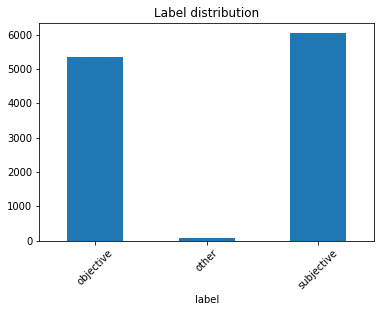

In [6]:
count_label = all_df.groupby(['label']).count().sentence_normalized
count_label.plot(kind='bar', rot=45, title="Label distribution")
print(count_label['other'])

Average number of words in each sentence: 21.2

Number of word in shortest sentence: 3
All rights reserved

Number of word in longest sentence: 108
based on the gruesome novella clive barker wrote especially for todd mcfarlane 's disturbing action figure line tortured souls is the story of six cenobite-like creatures agonistes a transformer of people into monsters who may be a creation of god the scyther-meister an assassin created by agonistes to bring a corrupt empire to its knees lucidique the daughter of a slain senator who is strangely falling in love with the scythe-meister talisac a twisted doctor who has impregnated and attached himself to a strange machine venal anatomica a hulking assassin with an inhuman bloodlust and mongroid talisac 's soon-to-be born child with a huge mouth in his stomach


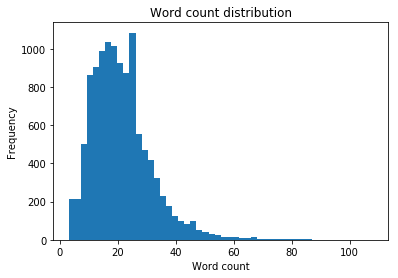

In [7]:
word_count_in_sentence = all_df['sentence_normalized'].map(word_count)
ax = word_count_in_sentence.plot.hist(bins=50, title="Word count distribution")
ax.set_xlabel("Word count")
print('Average number of words in each sentence: %.1f' % word_count_in_sentence.mean())
print()

print('Number of word in shortest sentence:', word_count_in_sentence.min())
print(all_df['sentence_normalized'][word_count_in_sentence.idxmin()])
print()

print('Number of word in longest sentence:', word_count_in_sentence.max())
print(all_df['sentence_normalized'][word_count_in_sentence.idxmax()])

## Dataset splitting

In [8]:
SEED = 23

test_size = 0.1
val_size  = 0.1

train_df, test_df = train_test_split(all_df, test_size=test_size, random_state=SEED)
train_df, val_df  = train_test_split(train_df, test_size=val_size / (1 - test_size), random_state=SEED)

print('Train size:', len(train_df.index))
print('Val size:', len(val_df.index))
print('Test size:', len(test_df.index))

save_dataset(train_df, "final.train.tsv")
save_dataset(val_df, "final.val.tsv")
save_dataset(test_df, "final.test.tsv")

Train size: 9175
Val size: 1147
Test size: 1147
